In [31]:
import numpy as np
import matplotlib.pyplot as plt

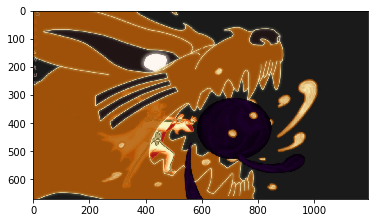

In [32]:
## Read in image & show on screen ##
image = plt.imread("ImageToBeProcessed.png")
plt.imshow(image)
plt.show()

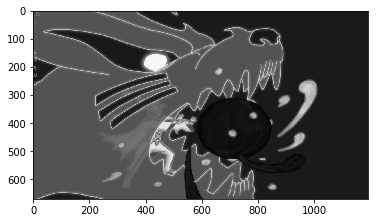

In [33]:
## Reduce dimensions (3xRGB -> 1xGreyscale) ##
## Pixels will now have a value between 0 - 1.
image_grey = image.mean(axis=2,keepdims=True)/1.0
image_grey = np.concatenate([image_grey]*3,axis=2)
n,m,d = image_grey.shape
plt.imshow(image_grey)
plt.show()

In [34]:
## Sobel Filters ##
Vertical_Filter   = [[-1,-2,-1],[0,0,0],[1,2,1]] # Due to the use of greyscale pixels, the max sum = 4 while min sum = -4
Horizontal_Filter = [[-1,0,1],[-2,0,2],[-1,0,1]]

In [35]:
Vertical_Edges_Image   = np.zeros_like(image_grey) # Create a zero matrix with same size as greyscaled image. 
Horizontal_Edges_Image = np.zeros_like(image_grey) # Create a zero matrix with same size as greyscaled image. 
Edge_Detected_Image    = np.zeros_like(image_grey) # Create a zero matrix with same size as greyscaled image.

In [36]:
## Convolute Matrices ##
for row in range (3, n-2): # Trauncate border of image
    for col in range (3, m-2):
        ROI = image_grey[row-1:row+2, col-1:col+2, 0] # Region of interest around pixel at (row,col)
        
        Vertical_Filter_Multiplication   = ROI * Vertical_Filter
        Vertical_Filter_Summation        = Vertical_Filter_Multiplication.sum()/4
        
        Horizontal_Filter_Multiplication = ROI * Horizontal_Filter
        Horizontal_Filter_Summation      = Horizontal_Filter_Multiplication.sum()/4
        
        Edge_Score = (Vertical_Filter_Summation**2 + Horizontal_Filter_Summation**2)**.5
        Edge_Detected_Image[row,col] = [Edge_Score]*3 # Python requires images to have a dimension of 3
Edge_Detected_Image = Edge_Detected_Image/Edge_Detected_Image.max()

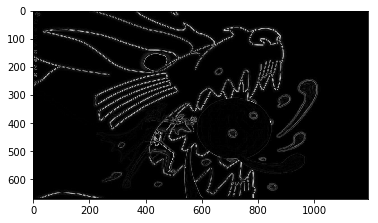

In [37]:
plt.imshow(Edge_Detected_Image)
plt.show()